# **SF Bay Area House Prices Prediction**

Created by Nick Tran, Tak Sum Li, Huu Hung Nguyen

Last updated: Dec 1, 2024

## **Introduction**

This project aims to build a machine learning model to predict house prices in the San Francisco Bay Area. By analyzing various features such as location, size, number of rooms, and other relevant factors, we aim to provide accurate price predictions that could be useful for buyers, sellers, and real estate professionals.

**Learning Outcomes:**

*   Data exploration and visualization
*   Data cleaning and preprocessing
*   Feature engineering
*   Implementing and tuning machine learning models
*   Evaluating model performance





# 1. Data Exploration




## 1.1. Library Import

* Import essential Python libraries for data manipulation and machine learning (e.g., NumPy, Pandas, Matplotlib, Scikit-learn)

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Preprocessing and feature engineering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from math import radians, cos, sin, asin, sqrt

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Machine learning algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')

## 1.2. Data Loading

* We load the dataset from a CSV file into a Pandas DataFrame for efficient data handling and manipulation.

In [2]:
data='https://raw.githubusercontent.com/csbfx/cs133/main/sf_bayarea_house_prices.csv'
df = pd.read_csv(data)
df.head()

,Address,City,State,Zip,Price,Beds,Baths,Home size,Lot size,Latitude,Longitude,SF time,PA time,School score,Commute time
0,2412 Palmer Ave,Belmont,CA,94002,1459000,3,2.0,1360.0,5001.0,37.516781,-122.304623,63,33,77.9,33
1,1909 Hillman Ave,Belmont,CA,94002,1595000,4,2.0,2220.0,3999.0,37.521972,-122.294079,63,33,77.9,33
2,641 Waltermire St,Belmont,CA,94002,899999,2,1.0,840.0,4234.0,37.520233,-122.273144,63,33,77.9,33
3,2706 Sequoia Way,Belmont,CA,94002,1588000,3,2.0,1860.0,5210.0,37.520192,-122.309437,63,33,77.9,33
4,1568 Winding Way,Belmont,CA,94002,1999000,4,3.5,2900.0,16117.2,37.524280,-122.291241,63,33,77.9,33


# 2. Data Visualization



*   Includes 5 unique and insightful questions answered with a variety of well-labeled and appropriate plots



#### Q1. What is the average population size in a single-family home based on property size and bedrooms?

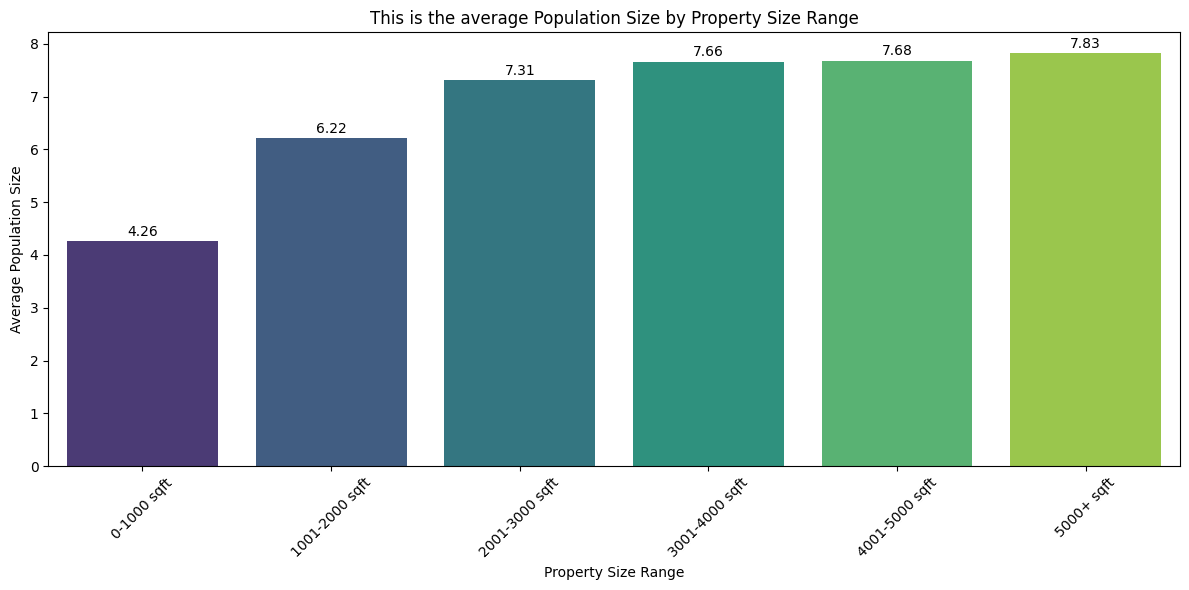

In [3]:


#we filter the dataset to include onlysingle family homes with 1- 4 bedroom
single_family = df[(df['Beds'] >= 1) & (df['Beds'] <= 4)].copy()

#very simple estimation
single_family['Population'] = single_family['Beds'] * 2

bins = [0, 1000, 2000, 3000, 4000, 5000, np.inf]
labels = ['0-1000 sqft', '1001-2000 sqft', '2001-3000 sqft', '3001-4000 sqft', '4001-5000 sqft', '5000+ sqft']

# We use pd.cut to assign each home to a property size range
single_family['Property Size Range'] = pd.cut(single_family['Home size'], bins=bins, labels=labels)

average_population = single_family.groupby('Property Size Range')['Population'].mean().reset_index()

#bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Property Size Range', y='Population', data=average_population, palette='viridis')

plt.title('This is the average Population Size by Property Size Range')
plt.xlabel('Property Size Range')
plt.ylabel('Average Population Size')

plt.xticks(rotation=45)

# input the population numbers on top of each bar by using for loop
for index, row in average_population.iterrows():
    plt.text(index, row['Population'] + 0.1, round(row['Population'], 2), color='black', ha="center")

plt.tight_layout()
plt.show()


#### Q2. How does school quality (school score) contribute to property prices?

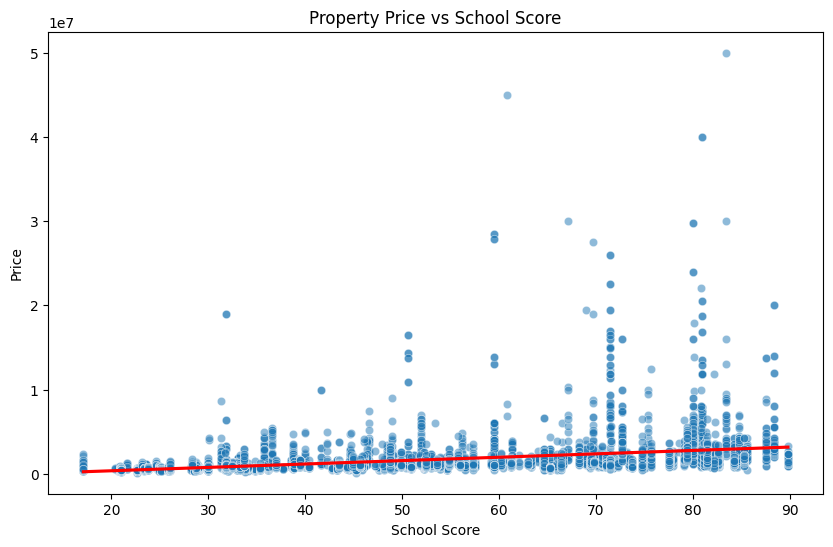

Correlation between School Score and Price: 0.33


In [4]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='School score', y='Price', data=df, alpha=0.5)
sns.regplot(x='School score', y='Price', data=df, scatter=False, color='red')
plt.title('Property Price vs School Score')
plt.xlabel('School Score')
plt.ylabel('Price')
plt.show()

correlation = df['School score'].corr(df['Price'])
print(f"Correlation between School Score and Price: {correlation:.2f}")


#### Q3. Which zip codes are the most expensive, and what features are common in these areas?

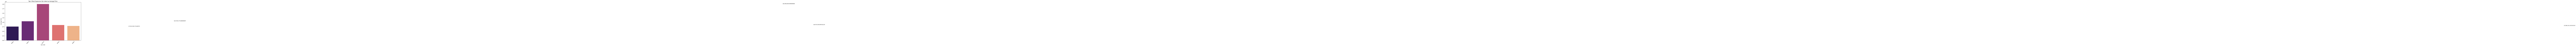

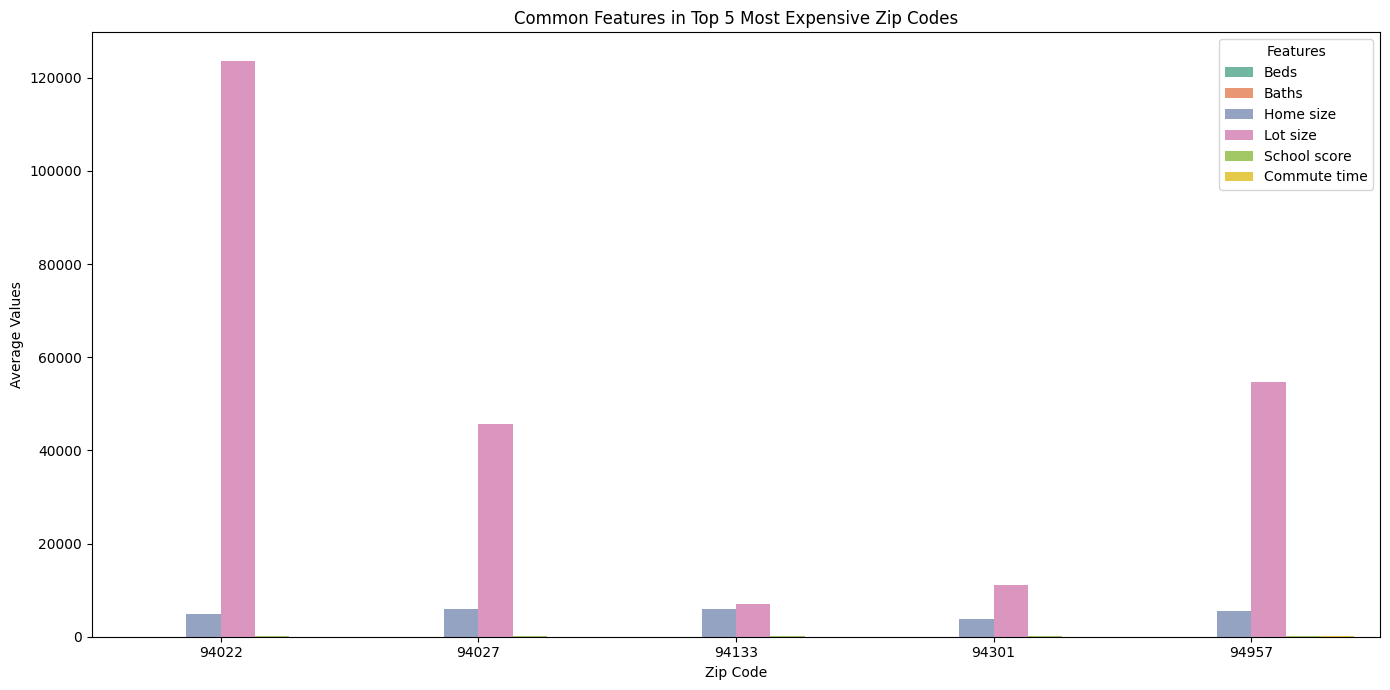

In [5]:
top_zipcodes = df.groupby('Zip')['Price'].mean().sort_values(ascending=False).head(5).index

top_zip_data = df[df['Zip'].isin(top_zipcodes)]

#We actually ran into a mismatched data when merging zip code features
#we fixed by putting consistent indexing and properly aligning the datasets before plotting.


average_features = top_zip_data.groupby('Zip')[['Beds', 'Baths', 'Home size', 'Lot size', 'School score', 'Commute time']].mean().reset_index()

plt.figure(figsize=(14, 7))
top_prices = df.groupby('Zip')['Price'].mean().reset_index().sort_values(by='Price', ascending=False).head(5)
sns.barplot(x='Zip', y='Price', data=top_prices, palette='magma')

plt.title('Top 5 Most Expensive Zip Codes by Average Price')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')

plt.xticks(rotation=45)
for index, row in top_prices.iterrows():
    plt.text(index, row['Price'] + 50000, f"${row['Price']:,}", color='black', ha="center")

plt.tight_layout()
plt.show()

# We'll melt the dataframe to make it right for a grouped bar plot
average_features_melted = average_features.melt(id_vars='Zip', var_name='Feature', value_name='Average Value')

# the common features
plt.figure(figsize=(14, 7))
sns.barplot(x='Zip', y='Average Value', hue='Feature', data=average_features_melted, palette='Set2')
plt.title('Common Features in Top 5 Most Expensive Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('Average Values')

plt.legend(title='Features')

plt.tight_layout()
plt.show()


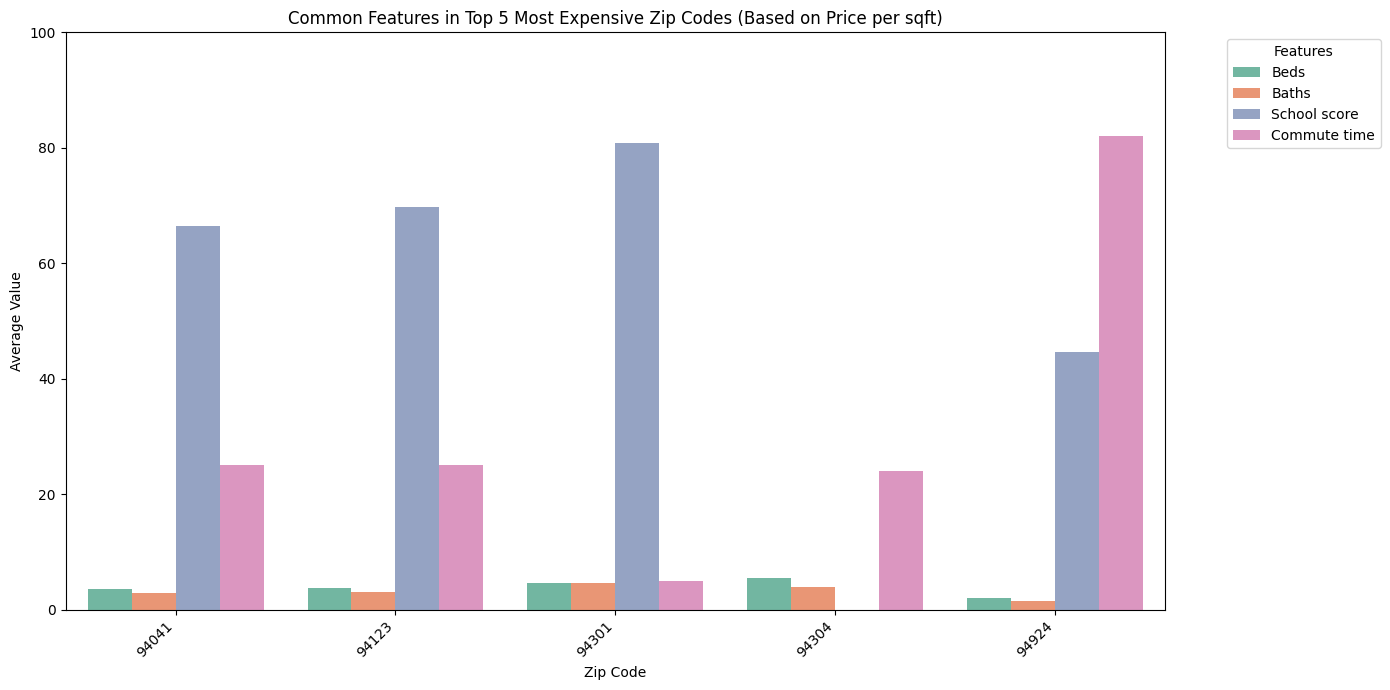

In [6]:

# --- Calculate Price per Square Foot and Outlier Removal ---
df['Price_per_sqft'] = df['Price'] / df['Home size']

# Outlier Removal based on Price per sqft
Q1 = df['Price_per_sqft'].quantile(0.25)
Q3 = df['Price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['Price_per_sqft'] <= upper_bound)]

# Calculate average price per sqft per zip code and select top 5 (using filtered_df)
top_zipcodes = filtered_df.groupby('Zip')['Price_per_sqft'].mean().sort_values(ascending=False).head(5).index
top_zip_data = filtered_df[filtered_df['Zip'].isin(top_zipcodes)]

# Calculate average features for top zip codes
average_features = top_zip_data.groupby('Zip')[['Beds', 'Baths', 'Home size', 'Lot size', 'School score', 'Commute time']].mean().reset_index()

# Merge average features back into top_zip_data
top_zip_data = pd.merge(top_zip_data, average_features, on='Zip', suffixes=('', '_Avg'))

# Create Plotly map
fig = px.scatter_mapbox(
    top_zip_data,
    lat="Latitude",
    lon="Longitude",
    color="Price_per_sqft",
    size="Home size_Avg",
    hover_data=["Zip", "City", "Beds_Avg", "Baths_Avg", "School score_Avg", "Commute time_Avg"],
    zoom=9,
    mapbox_style="carto-positron",
    title="Top 5 Most Expensive Zip Codes in the SF Bay Area (Based on Price per sqft)"
)

fig.update_layout(margin={"r": 0, "t": 50, "l": 0, "b": 0})
fig.show()

# Select specific features for visualization (Optional)
features_to_visualize = ['Beds', 'Baths', 'School score', 'Commute time']
average_features_selected = average_features[['Zip'] + features_to_visualize]

average_features_melted = average_features_selected.melt(id_vars='Zip', var_name='Feature', value_name='Average Value')

plt.figure(figsize=(14, 7))
sns.barplot(x='Zip', y='Average Value', hue='Feature', data=average_features_melted, palette='Set2')
plt.title('Common Features in Top 5 Most Expensive Zip Codes (Based on Price per sqft)')
plt.xlabel('Zip Code')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylim(0, 100)  # Adjust the upper limit

plt.tight_layout()
plt.show()

#### Q4. Are affordable housing* options available in areas with high-quality schools?

*   In public policy, housing is considered “affordable” when the household pays no more than 30% of their overall income in housing costs




<Figure size 1000x600 with 0 Axes>

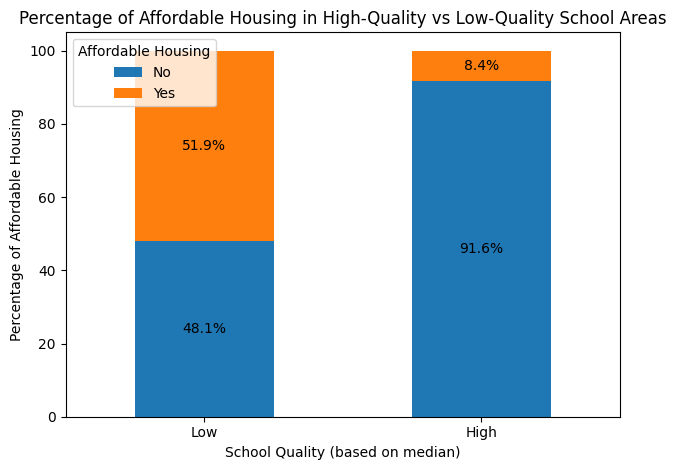

Contingency Table (Counts):
Affordable           False  True 
High_Quality_School              
False                 1725   1863
True                  3259    298

Contingency Table (Percentage):
Affordable           False  True 
High_Quality_School              
False                48.08  51.92
True                 91.62   8.38


In [7]:

price_threshold = df['Price'].quantile(0.3)
df['Affordable'] = df['Price'] <= price_threshold

school_median = df['School score'].median()
df['High_Quality_School'] = df['School score'] >= school_median

contingency = pd.crosstab(df['High_Quality_School'], df['Affordable'])

#Remember we have to conver count to percentage
contingency_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100

#Simple labeling
plt.figure(figsize=(10, 6))
contingency_pct.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Percentage of Affordable Housing in High-Quality vs Low-Quality School Areas')
plt.xlabel('School Quality (based on median)')
plt.ylabel('Percentage of Affordable Housing')
plt.xticks([0,1], ['Low', 'High'], rotation=0)
plt.legend(title='Affordable Housing', labels=['No', 'Yes'])
plt.tight_layout()


for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()


print("Contingency Table (Counts):")
print(contingency)

print("\nContingency Table (Percentage):")
print(contingency_pct.round(2))


#### Q5. What are the average commute times for various cities within the Bay Area, and how do they relate to property prices?

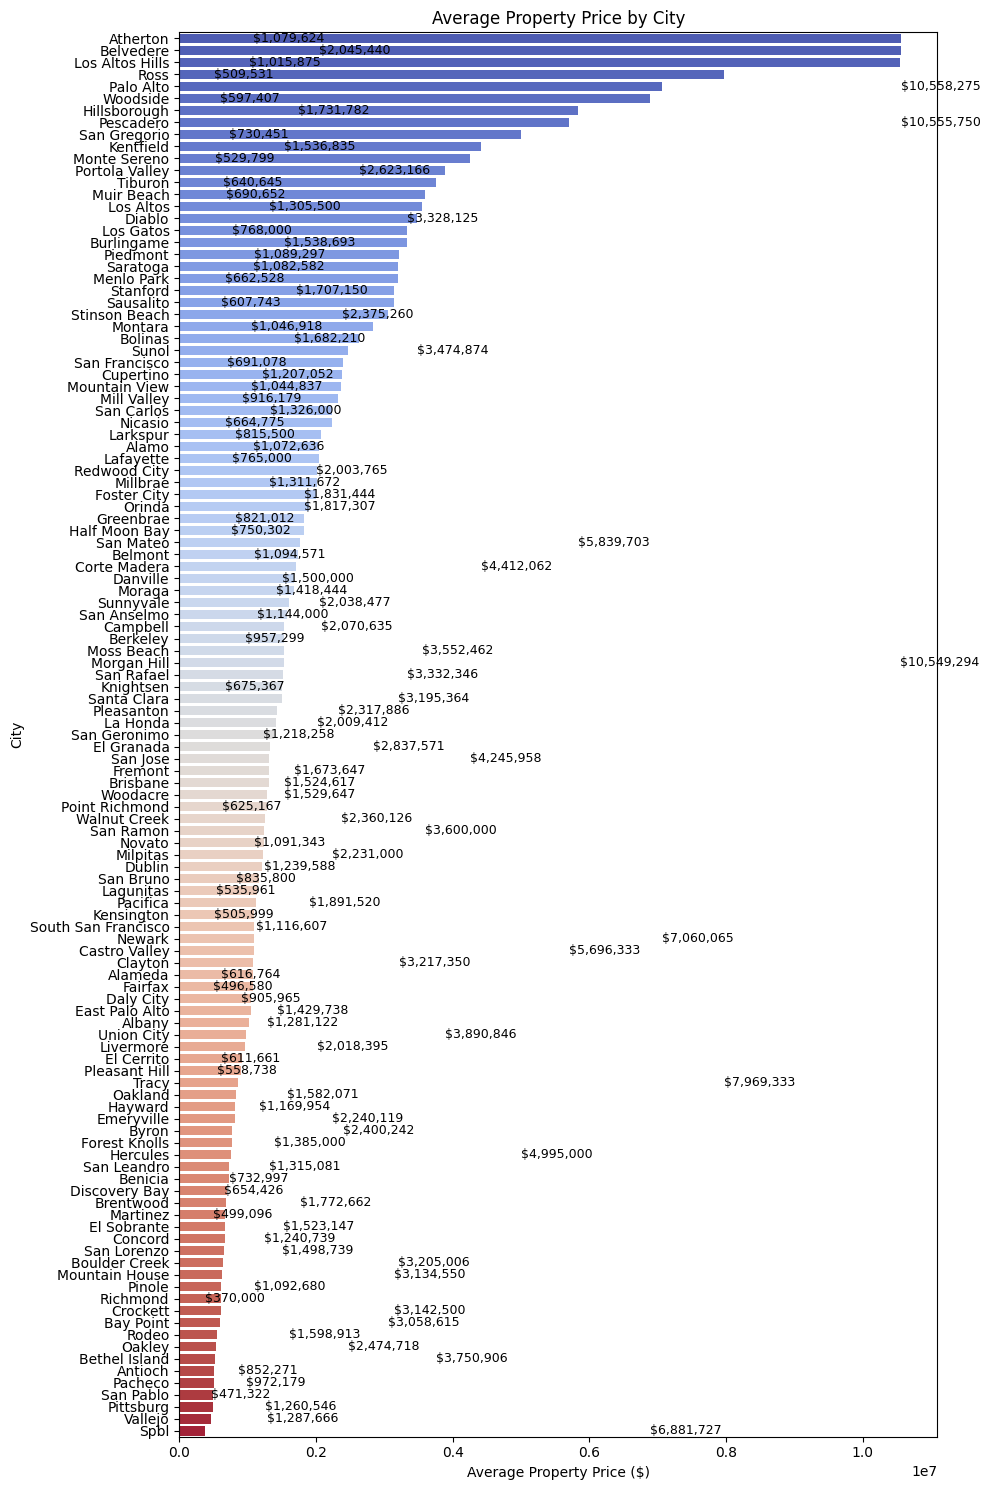

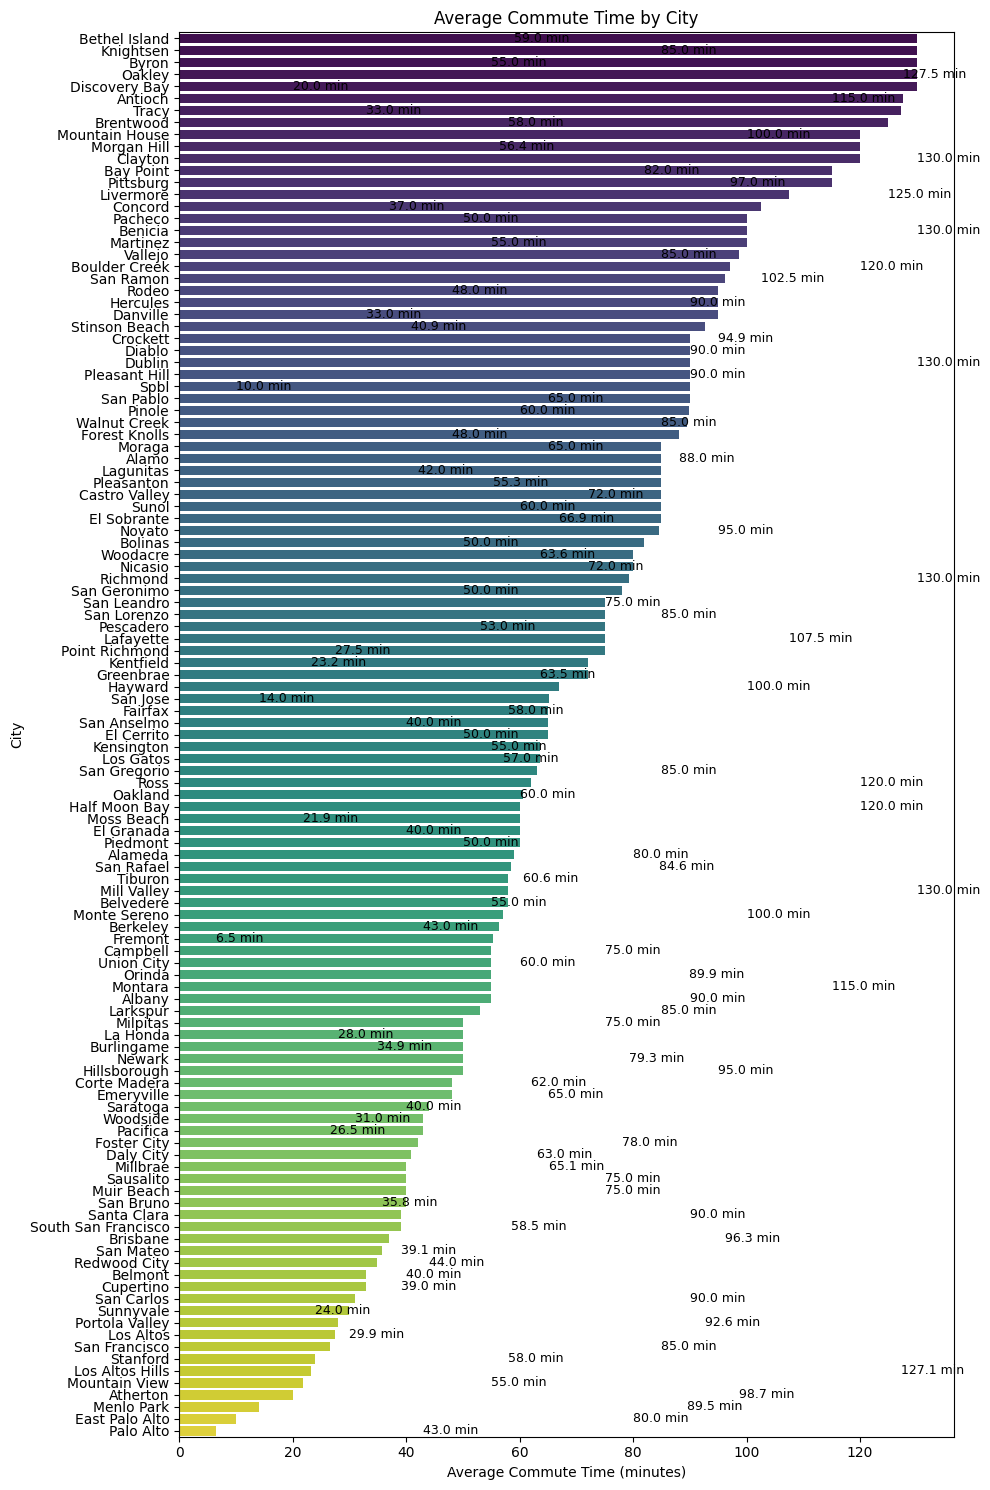

In [8]:
#The scatter plot was cluttered with too many city labels
#We switched to horizontal bar charts to show better display
average_commute = df.groupby('City')['Commute time'].mean().reset_index()
average_price = df.groupby('City')['Price'].mean().reset_index()

merged = pd.merge(average_commute, average_price, on='City')

merged_sorted = merged.sort_values(by='Price', ascending=False)

plt.figure(figsize=(10, 15))
sns.barplot(x='Price', y='City', data=merged_sorted, palette='coolwarm')
plt.title('Average Property Price by City')
plt.xlabel('Average Property Price ($)')
plt.ylabel('City')
for index, row in merged_sorted.iterrows():
    plt.text(row['Price'], index, f"${int(row['Price']):,}", va='center', fontsize=9)
plt.tight_layout()
plt.show()

merged_sorted = merged.sort_values(by='Commute time', ascending=False)

plt.figure(figsize=(10, 15))
sns.barplot(x='Commute time', y='City', data=merged_sorted, palette='viridis')
plt.title('Average Commute Time by City')
plt.xlabel('Average Commute Time (minutes)')
plt.ylabel('City')
for index, row in merged_sorted.iterrows():
    plt.text(row['Commute time'], index, f"{row['Commute time']:.1f} min", va='center', fontsize=9)
plt.tight_layout()
plt.show()

# I looped through the rows of our sorted data using for index, row in merged_sorted.iterrows().
#For each city, I used plt.text to place a label, like “35.2 min,” right next to the bar.


# 3. Data Preparation


*   In this section, we will clean and preprocess the data to prepare it for modeling. This includes handling missing values, encoding categorical variables, feature engineering, and scaling.





## 3.1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7145 entries, 0 to 7144
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              7137 non-null   object 
 1   City                 7145 non-null   object 
 2   State                7145 non-null   object 
 3   Zip                  7145 non-null   int64  
 4   Price                7145 non-null   int64  
 5   Beds                 7145 non-null   int64  
 6   Baths                7145 non-null   float64
 7   Home size            7063 non-null   float64
 8   Lot size             6880 non-null   float64
 9   Latitude             7145 non-null   float64
 10  Longitude            7145 non-null   float64
 11  SF time              7145 non-null   int64  
 12  PA time              7145 non-null   int64  
 13  School score         7085 non-null   float64
 14  Commute time         7145 non-null   int64  
 15  Price_per_sqft       7063 non-null   f

In [10]:
df.columns

Index(['Address', 'City', 'State', 'Zip', 'Price', 'Beds', 'Baths',
       'Home size', 'Lot size', 'Latitude', 'Longitude', 'SF time', 'PA time',
       'School score', 'Commute time', 'Price_per_sqft', 'Affordable',
       'High_Quality_School'],
      dtype='object')

In [11]:
df['State'].value_counts()

,count
State,
CA,7145


In [12]:
# Address and State don't provide useful information for the analysis
df.drop(columns=['Address', 'State'], inplace=True)

### 3.1.1. Handle numerical attributes

* We check for missing values in the dataset and handle them appropriately.

In [13]:
null_counts = df.isnull().sum()
null_cols = null_counts[null_counts > 0]
null_cols

,0
Home size,82
Lot size,265
School score,60
Price_per_sqft,82


In [14]:
# use median imputation to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df[null_cols.index])
df[null_cols.index] = imputer.transform(df[null_cols.index])

In [15]:
df.isnull().sum()

,0
City,0
Zip,0
Price,0
Beds,0
Baths,0
Home size,0
Lot size,0
Latitude,0
Longitude,0
SF time,0


### 3.1.2. Handle text/categorical attributes

We encode categorical variables to numerical format suitable for machine learning algorithms.

- **City**: We use Label Encoding.
- **Zip**: We use Target Encoding based on the mean house price.
- **Affordable** and **High_Quality_School**: Convert boolean values to integers.

In [16]:
df[['City', 'Zip', 'Affordable', 'High_Quality_School']].head()

,City,Zip,Affordable,High_Quality_School
0,Belmont,94002,False,True
1,Belmont,94002,False,True
2,Belmont,94002,False,True
3,Belmont,94002,False,True
4,Belmont,94002,False,True


In [17]:
# Encode the 'City' column using Label Encoding
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

In [18]:
# Perform Target Encoding on 'Zip' codes based on mean 'Price'
target_mean = df.groupby('Zip')['Price'].mean()
df['Zip_encoded'] = df['Zip'].map(target_mean)
df.drop('Zip', axis=1, inplace=True)

In [19]:
# Convert boolean columns to integers
df['Affordable'] = df['Affordable'].astype(int)
df['High_Quality_School'] = df['High_Quality_School'].astype(int)

In [20]:
df[['City', 'Zip_encoded', 'Affordable', 'High_Quality_School']].head()

,City,Zip_encoded,Affordable,High_Quality_School
0,6,1.731782e+06,0,1
1,6,1.731782e+06,0,1
2,6,1.731782e+06,0,1
3,6,1.731782e+06,0,1
4,6,1.731782e+06,0,1


### 3.1.3. Feature Engineering

We create new features to enhance the predictive power of our models:

- **Price_per_sqft**: Ratio of price to home size. (Created in Data Visualization)
- **Affordable** and **High_Quality_School** (Created in Data Visualization)

- **Distance_to_SF** and **Distance_to_PA**: Calculate the distance to San Francisco and Palo Alto using the Haversine formula.
- **Total_Rooms**: Sum of bedrooms and bathrooms.
- **School_Home_Interaction**: Interaction between school score and home size.
- **Beds_Baths**: Product of bedrooms and bathrooms.
- **Home_Lot_Ratio**: Ratio of home size to lot size.


In [21]:
def haversine(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # Compute distance
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Coordinates for San Francisco and Palo Alto
sf_coords = (37.7749, -122.4194)
pa_coords = (37.4419, -122.1430)

# Calculate distances
df['Distance_to_SF'] = df.apply(lambda row: haversine(row['Latitude'], row['Longitude'], *sf_coords), axis=1)
df['Distance_to_PA'] = df.apply(lambda row: haversine(row['Latitude'], row['Longitude'], *pa_coords), axis=1)

In [22]:
df['Total_Rooms'] = df['Beds'] + df['Baths']
df['School_Home_Interaction'] = df['School score'] * df['Home size']
df['Beds_Baths'] = df['Beds'] * df['Baths']
df['Home_Lot_Ratio'] = df['Home size'] / df['Lot size']

In [23]:
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [24]:
df.head()

,City,Price,Beds,Baths,Home size,Lot size,SF time,PA time,School score,Commute time,Price_per_sqft,Affordable,High_Quality_School,Zip_encoded,Distance_to_SF,Distance_to_PA,Total_Rooms,School_Home_Interaction,Beds_Baths,Home_Lot_Ratio
0,6,1459000,3,2.0,1360.0,5001.0,63,33,77.9,33,1072.794118,0,1,1.731782e+06,30.428559,16.514480,5.0,105944.0,6.0,0.271946
1,6,1595000,4,2.0,2220.0,3999.0,63,33,77.9,33,718.468468,0,1,1.731782e+06,30.211131,16.030843,6.0,172938.0,8.0,0.555139
2,6,899999,2,1.0,840.0,4234.0,63,33,77.9,33,1071.427381,0,1,1.731782e+06,31.107871,14.413392,3.0,65436.0,2.0,0.198394
3,6,1588000,3,2.0,1860.0,5210.0,63,33,77.9,33,853.763441,0,1,1.731782e+06,29.931221,17.072648,5.0,144894.0,6.0,0.357006
4,6,1999000,4,3.5,2900.0,16117.2,63,33,77.9,33,689.310345,0,1,1.731782e+06,30.065177,15.968862,7.5,225910.0,14.0,0.179932


### 3.1.4. Normalization

* We scale selected numerical features using Min-Max Scaling to bring them into a similar range, which can improve the performance of some machine learning algorithms.

In [25]:
df.describe()

,City,Price,Beds,Baths,Home size,Lot size,SF time,PA time,School score,Commute time,Price_per_sqft,Affordable,High_Quality_School,Zip_encoded,Distance_to_SF,Distance_to_PA,Total_Rooms,School_Home_Interaction,Beds_Baths,Home_Lot_Ratio
count,7145.000000,7.145000e+03,7145.000000,7145.000000,7145.000000,7.145000e+03,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7145.000000,7.145000e+03,7145.000000,7145.000000,7145.000000,7.145000e+03,7145.000000,7145.000000
mean,67.469559,1.676225e+06,3.594822,2.572498,2240.281875,2.727186e+04,83.335899,83.850385,52.654416,67.370749,686.803261,0.302449,0.497831,1.676225e+06,40.086258,40.972724,6.167320,1.273226e+05,10.082505,0.326773
std,32.188071,2.407593e+06,1.030743,1.127692,1361.941235,3.155157e+05,27.048451,34.195327,19.924229,29.160700,419.580996,0.459351,0.500030,1.646848e+06,21.012564,19.907422,2.001005,1.103310e+05,7.405027,0.236285
min,0.000000,1.290000e+05,1.000000,1.000000,107.000000,4.360000e+02,8.000000,5.000000,17.100000,5.000000,33.496034,0.000000,0.000000,4.281146e+05,0.693194,0.340225,2.000000,5.392800e+03,1.000000,0.000059
25%,40.000000,7.299500e+05,3.000000,2.000000,1413.000000,5.000000e+03,65.000000,60.000000,33.800000,47.000000,434.167573,0.000000,0.000000,7.770499e+05,23.034262,25.521258,5.000000,5.580090e+04,6.000000,0.190942
50%,71.000000,1.099988e+06,4.000000,2.500000,1904.000000,6.477000e+03,90.000000,85.000000,50.900000,63.000000,594.765021,0.000000,0.000000,1.207053e+06,38.600944,39.949335,6.000000,9.666670e+04,8.000000,0.269924
75%,94.000000,1.699000e+06,4.000000,3.000000,2632.000000,9.920000e+03,100.000000,110.000000,71.000000,90.000000,829.464286,1.000000,1.000000,1.774053e+06,57.785985,58.144406,7.000000,1.613736e+05,12.000000,0.401417
max,116.000000,4.999000e+07,13.000000,11.000000,20982.000000,1.364561e+07,170.000000,150.000000,89.800000,135.000000,6523.364486,1.000000,1.000000,2.006667e+07,99.666424,85.561771,20.500000,1.749899e+06,97.500000,4.370667


In [26]:
# using Min-Max Scaling to bring them into a similar range
scaler = MinMaxScaler()
cols = ['Home size', 'Lot size', 'Zip_encoded', 'Price_per_sqft', 'School_Home_Interaction']
df[cols] = scaler.fit_transform(df[cols])

## 3.2. Prepare test and training sets


*   We divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).





In [27]:
df.columns

Index(['City', 'Price', 'Beds', 'Baths', 'Home size', 'Lot size', 'SF time',
       'PA time', 'School score', 'Commute time', 'Price_per_sqft',
       'Affordable', 'High_Quality_School', 'Zip_encoded', 'Distance_to_SF',
       'Distance_to_PA', 'Total_Rooms', 'School_Home_Interaction',
       'Beds_Baths', 'Home_Lot_Ratio'],
      dtype='object')

In [28]:
# Split dataset in features and target variable
housing_prepared = df.drop(columns=['Price'])
housing_labels = df['Price']

# 4. Training the ML Models

In this section, we will explore and compare different regression models to predict house prices, which are continuous numerical variables.

- Decision Tree Regressor
- Random Forest Regressor
- K-Nearest Neighbors Regressor
- Support Vector Regressor

We will perform hyperparameter tuning using GridSearchCV to find the best parameters for each model.






## 4.1. Splitting Data

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing_labels, test_size=0.2, random_state=42) # 80% training and 20% test

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5716, 19), (1429, 19), (5716,), (1429,))

## 4.2. Building ML Models

### 4.2.1. Decision Tree

* Decision trees can capture complex, non-linear patterns without the need for data transformation.

#### a. Optimizing Decision Tree

* We use GridSearchCV to find the optimal hyperparameters for the Decision Tree Regressor.



In [31]:
# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Define the parameter grid for the Decision Tree Regressor
param_grid_dt = {
    'max_depth': [10, 50, 100],
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'splitter': ['best', 'random']
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Fit the GridSearchCV object to the training data
grid_search_dt.fit(X_train, y_train)

print("Best hyperparameters (Decision Tree Regressor):", grid_search_dt.best_params_)
print("Best estimator (Decision Tree Regressor):", grid_search_dt.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters (Decision Tree Regressor): {'criterion': 'poisson', 'max_depth': 50, 'splitter': 'best'}
Best estimator (Decision Tree Regressor): DecisionTreeRegressor(criterion='poisson', max_depth=50, random_state=42)


#### b. Training the Optimized Decision Tree Model

In [32]:
# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(criterion='poisson', max_depth=50, random_state=42)

# Train the model
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=50, random_state=42)

### 4.2.2. Random Forest

* Random Forests can combine multiple decision trees to improve predictive accuracy and control overfitting.

#### a. Optimizing Random Forest

* We use GridSearchCV to find the optimal hyperparameters for the Random Forest Regressor.


In [33]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'max_depth': [10, 50, 100],
    'criterion': ['squared_error', 'absolute_error'],
    'n_estimators': [10]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train, y_train)

print("Best hyperparameters (Random Forest Regressor):", grid_search_rf.best_params_)
print("Best estimator (Random Forest Regressor):", grid_search_rf.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameters (Random Forest Regressor): {'criterion': 'absolute_error', 'max_depth': 50, 'n_estimators': 10}
Best estimator (Random Forest Regressor): RandomForestRegressor(criterion='absolute_error', max_depth=50, n_estimators=10,
                      random_state=42)


#### b. Training the Optimized Random Forest Model

In [34]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(criterion='absolute_error', max_depth=50, n_estimators=10,
                      random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=50, n_estimators=10,
                      random_state=42)

### 4.2.3. K-nearest neighbors

* It is a simple model. Therefore, we can train it fast to compare with other models



#### a. Optimizing KNN

* We use GridSearchCV to find the optimal hyperparameters for the KNN Regressor.

In [35]:
# Initialize the KNN Regressor
knn = KNeighborsRegressor()

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [1, 5, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Fit the GridSearchCV object to the training data
grid_search_knn.fit(X_train, y_train)

print("Best hyperparameters (KNN Regressor):", grid_search_knn.best_params_)
print("Best estimator (KNN Regressor):", grid_search_knn.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters (KNN Regressor): {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best estimator (KNN Regressor): KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')


#### b. Training the Optimized KNN Model

In [36]:
# Initialize the KNN (K- Nearest Neighbors) Regressor
knn = KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')

# Train the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')

### 4.2.4. Support Vector Machine (SVM)

* SVM is good and effective for datasets with many features.

#### a. Optimizing SVM

* We use GridSearchCV to find the optimal hyperparameters for the Support Vector Regressor.

In [37]:
# Initialize the SVR model
svr = SVR()

# Define the parameter grid for SVR
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100],
    'epsilon': [0.1],
    'gamma': ['scale']
}

# Initialize GridSearchCV
grid_search_svr = GridSearchCV(
    estimator=svr,
    param_grid=param_grid_svr,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Fit the GridSearchCV object to the training data
grid_search_svr.fit(X_train, y_train)

# Display the best parameters and estimator
print("Best hyperparameters (SVR):", grid_search_svr.best_params_)
print("Best estimator (SVR):", grid_search_svr.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameters (SVR): {'C': 100, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best estimator (SVR): SVR(C=100, kernel='linear')


#### b. Training the Optimized SVM Model

In [38]:
# Initialize the SVR model
svr = SVR(C=100, kernel='linear')

# Train the model
svr.fit(X_train, y_train)

SVR(C=100, kernel='linear')

# 5. Evaluation Metrics





## 5.1. Compare

* We evaluate each model using 10-fold cross-validation to assess their performance on unseen data.


In [39]:
# Initialize metrics
metrics = {
    'Decision Tree': {'RMSEs': [], 'MAEs': [], 'R2s': []},
    'Random Forest': {'RMSEs': [], 'MAEs': [], 'R2s': []},
    'KNN': {'RMSEs': [], 'MAEs': [], 'R2s': []},
    'SVM': {'RMSEs': [], 'MAEs': [], 'R2s': []}
}

In [40]:
# Define the scoring metrics
scoring = {
    'MSE': 'neg_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

# List of models for iteration
models = [('Decision Tree', dt),
          ('Random Forest', rf),
          ('KNN', knn),
          ('SVM', svr)
         ]

# Iterate over each model and perform cross-validation
for name, model in models:
    # Perform cross-validation
    cv_results = cross_validate(
        model,
        housing_prepared,
        housing_labels,
        cv=10,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=True)

    # Extract test scores
    mse_scores = -cv_results['test_MSE']
    mae_scores = -cv_results['test_MAE']
    r2_scores = cv_results['test_R2']

    # Compute mean and standard deviation for each metric
    mean_rmse = np.sqrt(mse_scores.mean())
    std_rmse = np.sqrt(mse_scores.std())
    metrics[name]['RMSEs'] = [mean_rmse]

    mean_mae = mae_scores.mean()
    std_mae = mae_scores.std()
    metrics[name]['MAEs'] = [mean_mae]

    mean_r2 = r2_scores.mean()
    std_r2 = r2_scores.std()
    metrics[name]['R2s'] = [mean_r2]

    # Print the performance metrics
    print(f"{name} Regression:")
    print("  RMSE:")
    print(f"    Mean: {mean_rmse:.2f}")
    print(f"    Std: {std_rmse:.2f}")
    print(f"  MAE:")
    print(f"    Mean: {mean_mae:.2f}")
    print(f"    Std: {std_mae:.2f}")
    print(f"  R² Score:")
    print(f"    Mean: {mean_r2:.4f}")
    print(f"    Std: {std_r2:.4f}")
    print('-'*40)


Decision Tree Regression:
  RMSE:
    Mean: 1064094.00
    Std: 1415211.31
  MAE:
    Mean: 211288.71
    Std: 234608.78
  R² Score:
    Mean: 0.8523
    Std: 0.1032
----------------------------------------
Random Forest Regression:
  RMSE:
    Mean: 672429.35
    Std: 899734.08
  MAE:
    Mean: 145518.23
    Std: 140969.26
  R² Score:
    Mean: 0.9478
    Std: 0.0380
----------------------------------------
KNN Regression:
  RMSE:
    Mean: 2115577.52
    Std: 2590005.15
  MAE:
    Mean: 730004.43
    Std: 543392.41
  R² Score:
    Mean: 0.0464
    Std: 0.4744
----------------------------------------
SVM Regression:
  RMSE:
    Mean: 2047364.54
    Std: 2605061.75
  MAE:
    Mean: 667953.22
    Std: 560882.80
  R² Score:
    Mean: 0.3964
    Std: 0.1930
----------------------------------------


## 5.2. Metrics Visualization

* We visualize the performance metrics of each model to compare their effectiveness.


In [41]:
models = ['Decision Tree', 'Random Forest', 'KNN', 'SVM']
rmses = [np.mean(metrics['Decision Tree']['RMSEs']),
         np.mean(metrics['Random Forest']['RMSEs']),
         np.mean(metrics['KNN']['RMSEs']),
         np.mean(metrics['SVM']['RMSEs'])
        ]
maes = [np.mean(metrics['Decision Tree']['MAEs']),
        np.mean(metrics['Random Forest']['MAEs']),
        np.mean(metrics['KNN']['MAEs']),
        np.mean(metrics['SVM']['MAEs'])
       ]
r2s = [np.mean(metrics['Decision Tree']['R2s']),
       np.mean(metrics['Random Forest']['R2s']),
       np.mean(metrics['KNN']['R2s']),
       np.mean(metrics['SVM']['R2s'])
      ]

# First chart: RMSEs and MAEs
fig1 = go.Figure(data=[
    go.Bar(name='RMSEs', x=models, y=rmses, text=np.round(rmses, 2), textposition='outside'),
    go.Bar(name='MAEs', x=models, y=maes, text=np.round(maes, 2), textposition='outside')
])

fig1.update_layout(
    barmode='group',
    title_text='RMSEs and MAEs Comparison of Different Models',
    yaxis=dict(title='Scores'),
    xaxis=dict(title='Models')
)

fig1.show()

# Second chart: R² Scores
fig2 = go.Figure(data=[
    go.Bar(name='R² Scores', x=models, y=r2s, text=np.round(r2s, 4), textposition='outside', marker_color='seagreen')
])

fig2.update_layout(
    title_text='R² Scores Comparison of Different Models',
    yaxis=dict(title='R² Score', range=[0, 1]),
    xaxis=dict(title='Models')
)

fig2.show()


Random Forest Regression has the lowest Mean RMSE and the highest Mean R² Score, indicating it is the best model among the three.

# 6. Testing & Final Evaluation

* Based on cross-validation results, the Random Forest Regressor performed the best. We evaluate it on the test set.


## 6.1. Random Forest Regression

In [42]:
# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Random Forest Regression Test Set Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Regression Test Set Performance:
RMSE: 818611.95
MAE: 108721.66
R² Score: 0.8954


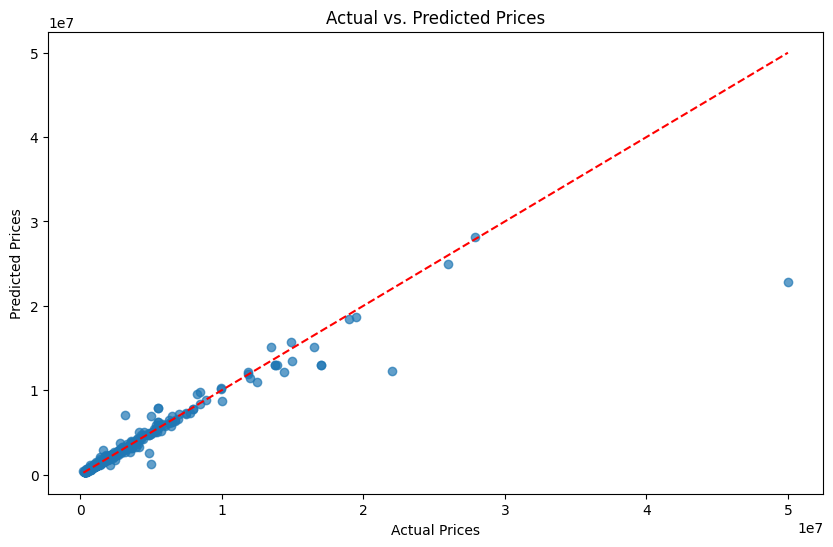

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

## 6.2. Feature Importances

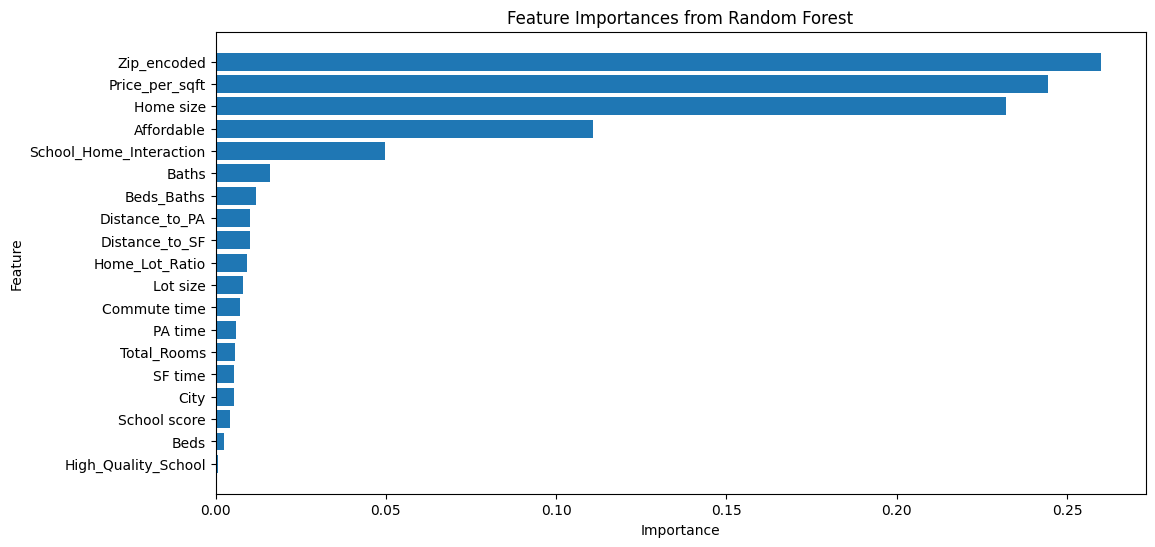

In [44]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# 7. Conclusion

After evaluating multiple regression models, the Random Forest Regressor demonstrated the best performance with the lowest RMSE and highest R² score. Through careful data preprocessing, feature engineering, and hyperparameter tuning, we improved the model's predictive accuracy.

### **Next Steps**

- **Data Expansion**: Collect more data to improve model generalizability.
- **Feature Enhancement**: Explore additional features such as neighborhood amenities, crime rates, and economic indicators.
- **Model selection and tuning**: Explore additional parameters such as `n_estimators` and `n_neighbors`
